In [5]:
import os
import xarray as xr
import numpy as np
from metpy.calc import virtual_temperature
from metpy.units import units
from metpy.constants import *
from src.buoyancy import *
from src.plotting import *

In [6]:
t_files = moisture_space_file_list('TABS')[13:14]
qv_files = moisture_space_file_list('QV')[13:14]

total_files = len(t_files)


In [ ]:

for i, (tf, qvf) in enumerate(zip(t_files, qv_files), start=1):
    print(f"Processing file {i}/{total_files}: T-file: {os.path.basename(tf)}, QV-file: {os.path.basename(qvf)}")
    # Your processing code goes here

    # Make sure files match
    tf_index = os.path.basename(tf).rfind('_')
    qvf_index = os.path.basename(qvf).rfind('_')
    assert(os.path.basename(tf)[:tf_index] == os.path.basename(qvf)[:qvf_index])


    t = xr.open_dataset(tf)
    qv = xr.open_dataset(qvf)

    t = t.TABS.metpy.convert_units('K')
    q = (1000*qv).QV.metpy.convert_units('dimensionless')  # converted to kg/kg

    tv = virtual_temperature(t, q)
    tv_bar = tv.mean('column')

    b = earth_gravity * (tv-tv_bar) / tv_bar
    break

In [18]:
file = '/glade/u/home/pangulo/work/gsam_dyamond_winter/northwest_tropical_pacific/W_moisture_space_grids_50pix/satfrac_sorted.lon_8.lat_2.northwest_tropical_pacific.DYAMOND2_9216x4608x74_10s_4608_20200212030000_0000199800_W.atm.3D.nc'

In [54]:
t = xr.open_dataset(file.replace('W', 'TABS'))
qv = xr.open_dataset(file.replace('W', 'QV'))

t = t.TABS.metpy.convert_units('K')
q = (1000*qv).QV.metpy.convert_units('dimensionless')  # converted to kg/kg

tv = virtual_temperature(t, q)
tv_bar = tv.mean('column')

b = earth_gravity * (tv-tv_bar) / tv_bar

(-0.5, 0.5)

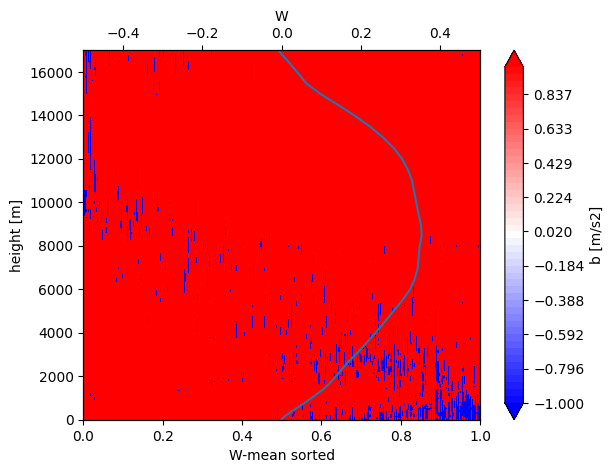

In [57]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
fig, ax = plt.subplots()
levels = np.linspace(-1, 1, 50)
w = xr.open_dataset(file).W
# bx = b.sortby(w.mean('z'))
bx = b
bx = b*1000*1000/9.81
bx.plot.contourf(levels=levels,
                extend='both',
                cmap=plt.cm.bwr.copy(),
                norm=colors.TwoSlopeNorm(vmin=levels.min(), vcenter=0, vmax=levels.max()), 
                cbar_kwargs={'label': 'b [m/s2]'})
ax.set_xlabel('W-mean sorted')
plt.ylim(0, 17e3)
ax2 = ax.twiny()

w.mean('column').plot(ax=ax2, y='z')
ax2.set_xlim(-0.5, 0.5)